In [3]:
import numpy as np
import pandas as pd

# Read a specific sheet
df = pd.read_excel(r"C:\Users\William\OneDrive\Documents\Data Cleaning\LARUAN.xlsx", sheet_name='04-VAL04L-PM-1 T SANTIAGO_Press')

print(df.head())

  Unnamed: 0                          Unnamed: 1           Unnamed: 2  \
0        NaN                                 NaN                  NaN   
1        NaN                                 NaN                  NaN   
2        PMP  04-VAL04L-PM-1 T SANTIAGO_Pressure            DATE/TIME   
3        NaN                                 NaN  2022-01-01 00:00:00   
4        NaN                                 NaN  2022-01-01 00:15:00   

                                   Unnamed: 3  
0                                         NaN  
1                                         NaN  
2                                  DATA (psi)  
3  [-11057] Not Enough Values For Calculation  
4  [-11057] Not Enough Values For Calculation  


In [99]:
# Drop the unnamed column
df.drop(['Unnamed: 1', 'Unnamed: 0'], axis=1, inplace=True)
import numpy as np

# Replace the placeholder with NaN
#df.replace('[-11057] Not Enough Values For Calculation', np.nan, inplace=True)
df.fillna(np.random.randint(1, 7), inplace=True)
df.to_csv('semicleaned.csv', index=False)


In [100]:
df.isnull().sum()
df.head(5)

,Unnamed: 2,Unnamed: 3
0,1,1
1,1,1
2,DATE/TIME,DATA (psi)
3,2022-01-01 00:00:00,[-11057] Not Enough Values For Calculation
4,2022-01-01 00:15:00,[-11057] Not Enough Values For Calculation


In [106]:
df2 = pd.read_csv("semicleaned.csv", skiprows=3)
df.columns = ['DATE/TIME', 'DATA (psi)']
df2.replace('[-11057] Not Enough Values For Calculation', np.nan, inplace=True)
df2
#df2.isnull().sum()

,DATE/TIME,DATA (psi)
0,2022-01-01 00:00:00,NaN
1,2022-01-01 00:15:00,NaN
2,2022-01-01 00:30:00,NaN
3,2022-01-01 00:45:00,NaN
4,2022-01-01 01:00:00,NaN
...,...,...
101659,2024-11-24 22:45:00,20.59000015258789
101660,2024-11-24 23:00:00,21.299999237060547
101661,2024-11-24 23:15:00,22.010000228881836
101662,2024-11-24 23:30:00,22.719999313354492


In [ ]:
#changing the data types of my columns
df2['DATA (psi)'] = pd.to_numeric(df2['DATA (psi)'], errors='coerce')
df2['DATE/TIME'] = pd.to_datetime(df['DATE/TIME'], errors='coerce')
print(df2.dtypes)


DATE/TIME     datetime64[ns]
DATA (psi)           float64
dtype: object


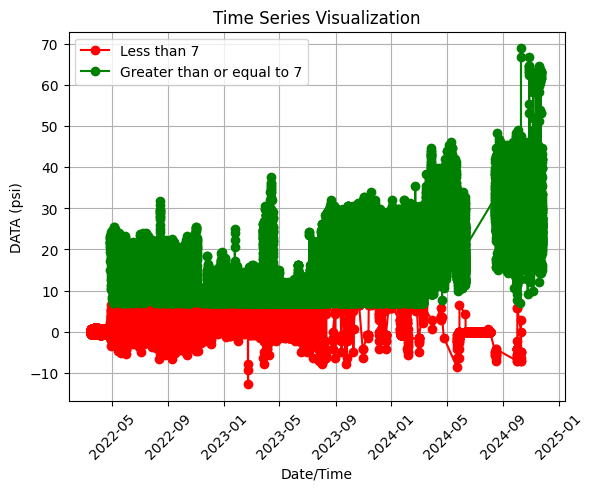

In [120]:
# Filter the data
less_than_7 = df2[df2['DATA (psi)'] < 7]
greater_equal_7 = df2[df2['DATA (psi)'] >= 7]

# Plot values < 7
plt.plot(less_than_7['DATE/TIME'], less_than_7['DATA (psi)'], 
         'ro-', label='Less than 7')  # Red circles

# Plot values >= 7
plt.plot(greater_equal_7['DATE/TIME'], greater_equal_7['DATA (psi)'], 
         'go-', label='Greater than or equal to 7')  # Green circles

# Add labels and title
plt.xlabel('Date/Time')
plt.ylabel('DATA (psi)')
plt.title('Time Series Visualization')

# Add grid, legend, and improved readability
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.show()



In [129]:
percentage_less_than_7 = (count_less_than_7 / len(df)) * 100
percentage_greater_equal_7 = (count_greater_equal_7 / len(df)) * 100

print(f"Percentage less than 7: {percentage_less_than_7:.2f}%")
print(f"Percentage greater than or equal to 7: {percentage_greater_equal_7:.2f}%")

Percentage less than 7: 43.02%
Percentage greater than or equal to 7: 47.92%


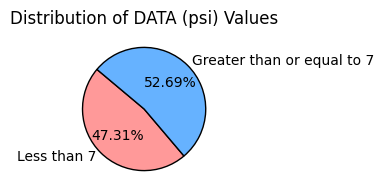

In [131]:
import matplotlib.pyplot as plt

# Count data points
count_less_than_7 = (df['DATA (psi)'] < 7).sum()
count_greater_equal_7 = (df['DATA (psi)'] >= 7).sum()

# Data for the pie chart
labels = ['Less than 7', 'Greater than or equal to 7']
sizes = [count_less_than_7, count_greater_equal_7]
colors = ['#FF9999', '#66B2FF']

# Plotting
plt.figure(figsize=(2, 2))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.2f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of DATA (psi) Values')
plt.show()


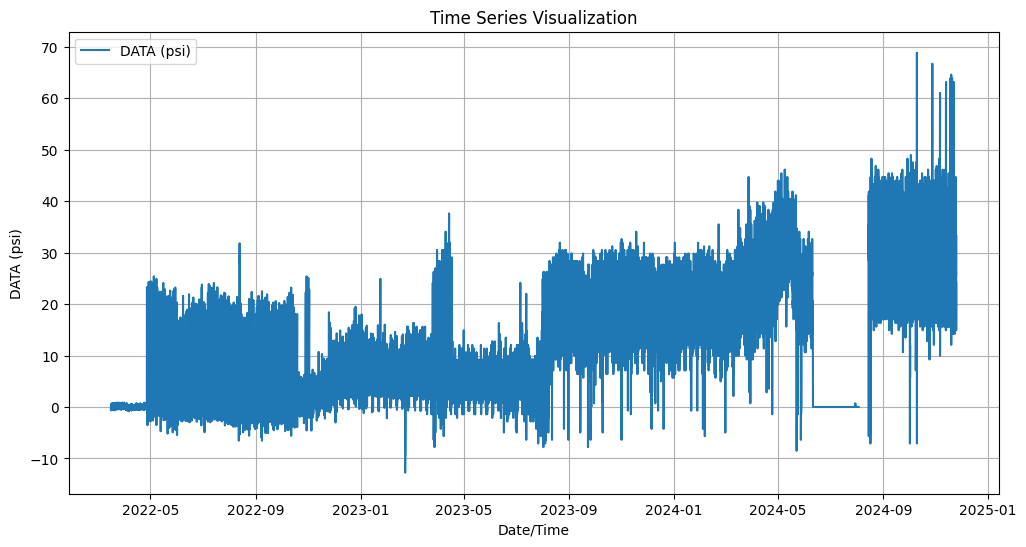

In [133]:
plt.figure(figsize=(12, 6))
plt.plot(df2['DATE/TIME'], df2['DATA (psi)'], label='DATA (psi)')
plt.title('Time Series Visualization')
plt.xlabel('Date/Time')
plt.ylabel('DATA (psi)')
plt.grid(True)
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'tensorflow'